## A Data-Driven Analysis of Movie Success

#### About Dataset: 
This dataset contains information about the top 1000 grossing Hollywood movies, focusing on factors that contribute to their success. 

#### Goal:
By performing a data analysis using Python, the aim of this project is to identify and understand the key factors that contribute to a movie's financial success, by analysing factors such as budget, running time and the release dates to uncover patterns and insights. 

### Pre-processing

Import the necessary libraries:

In [472]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns


import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline

Reading the data: 

In [473]:
data = pd.read_csv('Highest Holywood Grossing Movies.csv', encoding='latin1')

Looking at the data:

In [474]:
data.head()

,Unnamed: 0,Title,Movie Info,Year,Distributor,Budget (in $),Domestic Opening (in $),Domestic Sales (in $),International Sales (in $),World Wide Sales (in $),Release Date,Genre,Running Time,License
0,0,Avatar,A paraplegic Marine dispatched to the moon Pan...,2009,Twentieth Century Fox,237000000,77025481,785221649,2138484377,2923706026,16-Dec-09,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
1,1,Avengers: Endgame,After the devastating events of Avengers: Infi...,2019,Walt Disney Studios Motion Pictures,356000000,357115007,858373000,1941066100,2799439100,24-Apr-19,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar: The Way of Water,Jake Sully lives with his newfound family form...,2022,20th Century Studios,December 14 2022 (EMEA APAC),134100226,684075767,1636174514,2320250281,24-Apr-19,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
3,3,Titanic,A seventeen-year-old aristocrat falls in love ...,1997,Paramount Pictures,200000000,28638131,674292608,1590450697,2264743305,19-Dec-97,"['Drama', 'Romance']",3 hr 14 min,PG-13
4,4,Star Wars: Episode VII - The Force Awakens,"As a new threat to the galaxy rises, Rey, a de...",2015,Walt Disney Studios Motion Pictures,245000000,247966675,936662225,1134647993,2071310218,16-Dec-15,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13


Data Cleaning

Remove unnecessary columns - Domestic and International sales are both included in the target variable (World Wide Sales).

In [475]:
data = data.drop(['Unnamed: 0','Movie Info','Domestic Sales (in $)','International Sales (in $)'], axis=1)

Check the data type of each column

In [476]:
print(data.dtypes)

Title                      object
Year                        int64
Distributor                object
Budget (in $)              object
Domestic Opening (in $)    object
World Wide Sales (in $)     int64
Release Date               object
Genre                      object
Running Time               object
License                    object
dtype: object


Adding a month column:

In [477]:
data['Release Date'] = pd.to_datetime(data['Release Date'], format = '%d-%b-%y')

In [478]:
data['Month'] = data['Release Date'].astype(str).str[5:7]


Convert necessary columns to correct data type:

In [479]:
dollar_columns = ['Budget (in $)','Domestic Opening (in $)']
for col in dollar_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

print(data.dtypes)

Title                              object
Year                                int64
Distributor                        object
Budget (in $)                     float64
Domestic Opening (in $)           float64
World Wide Sales (in $)             int64
Release Date               datetime64[ns]
Genre                              object
Running Time                       object
License                            object
Month                              object
dtype: object


Ordering the data by budget:

In [480]:
data.sort_values(by=['Budget (in $)'],inplace=False,ascending=False)

,Title,Year,Distributor,Budget (in $),Domestic Opening (in $),World Wide Sales (in $),Release Date,Genre,Running Time,License,Month
1,Avengers: Endgame,2019,Walt Disney Studios Motion Pictures,356000000.0,357115007.0,2799439100,2019-04-24,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13,04
18,Star Wars: Episode VIII - The Last Jedi,2017,Walt Disney Studios Motion Pictures,317000000.0,220009584.0,1334407706,2017-12-13,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 32 min,PG-13,12
59,Pirates of the Caribbean: At World's End,2007,Walt Disney Studios Motion Pictures,300000000.0,114732820.0,961691209,2007-05-22,"['Action', 'Adventure', 'Fantasy']",2 hr 49 min,PG-13,05
196,Mission: Impossible - Dead Reckoning Part One,2023,Paramount Pictures,291000000.0,54688347.0,567535383,2023-07-08,"['Action', 'Adventure', 'Thriller']",2 hr 43 min,PG-13,07
354,Solo: A Star Wars Story,2018,Walt Disney Studios Motion Pictures,275000000.0,84420489.0,392924807,2018-05-23,"['Action', 'Adventure', 'Sci-Fi']",2 hr 15 min,PG-13,05
...,...,...,...,...,...,...,...,...,...,...,...
981,Cape Fear,1991,Universal Pictures,NaN,10261025.0,182291969,2012-03-15,"['Adventure', 'Comedy', 'Drama', 'Family', 'Fa...",1 hr 46 min,PG,03
988,The First Wives Club,1996,Paramount Pictures,NaN,18913411.0,181489203,2006-05-10,"['Action', 'Adventure', 'Thriller']",1 hr 38 min,PG-13,05
989,Cliff Walkers,2021,CMC Pictures,NaN,53142.0,181325565,2006-05-10,"['Action', 'Adventure', 'Thriller']",1 hr 38 min,PG-13,05
990,Scooby-Doo 2: Monsters Unleashed,2004,Warner Bros.,NaN,29438331.0,181239132,2006-05-10,"['Action', 'Adventure', 'Thriller']",1 hr 38 min,PG-13,05


Checking for missing data

In [481]:
for col in data.columns:
    percent_missing = np.mean(data[col].isnull())
    print('{}-{}%'.format(col,round(percent_missing*100)))

Title-0%
Year-0%
Distributor-0%
Budget (in $)-22%
Domestic Opening (in $)-3%
World Wide Sales (in $)-0%
Release Date-0%
Genre-0%
Running Time-0%
License-6%
Month-0%


Removing missing values and duplicates

In [482]:
data = data.dropna()
data.drop_duplicates()

,Title,Year,Distributor,Budget (in $),Domestic Opening (in $),World Wide Sales (in $),Release Date,Genre,Running Time,License,Month
0,Avatar,2009,Twentieth Century Fox,237000000.0,77025481.0,2923706026,2009-12-16,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13,12
1,Avengers: Endgame,2019,Walt Disney Studios Motion Pictures,356000000.0,357115007.0,2799439100,2019-04-24,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13,04
3,Titanic,1997,Paramount Pictures,200000000.0,28638131.0,2264743305,1997-12-19,"['Drama', 'Romance']",3 hr 14 min,PG-13,12
4,Star Wars: Episode VII - The Force Awakens,2015,Walt Disney Studios Motion Pictures,245000000.0,247966675.0,2071310218,2015-12-16,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13,12
7,Jurassic World,2015,Universal Pictures,150000000.0,208806270.0,1671537444,2015-06-10,"['Action', 'Adventure', 'Sci-Fi']",2 hr 4 min,PG-13,06
...,...,...,...,...,...,...,...,...,...,...,...
994,The Scorpion King,2002,Universal Pictures,60000000.0,36075875.0,180630907,2002-04-18,"['Action', 'Adventure', 'Fantasy']",1 hr 32 min,PG-13,04
995,Sweet Home Alabama,2002,Walt Disney Studios Motion Pictures,30000000.0,35648740.0,180622424,2002-09-27,"['Comedy', 'Romance']",1 hr 48 min,PG-13,09
996,Daddy's Home 2,2017,Paramount Pictures,69000000.0,29651193.0,180613824,2017-11-09,['Comedy'],1 hr 40 min,PG-13,11
997,Hacksaw Ridge,2016,Lionsgate,40000000.0,15190758.0,180563636,2016-11-03,"['Biography', 'Drama', 'History', 'War']",2 hr 19 min,R,11


Checking for outliers

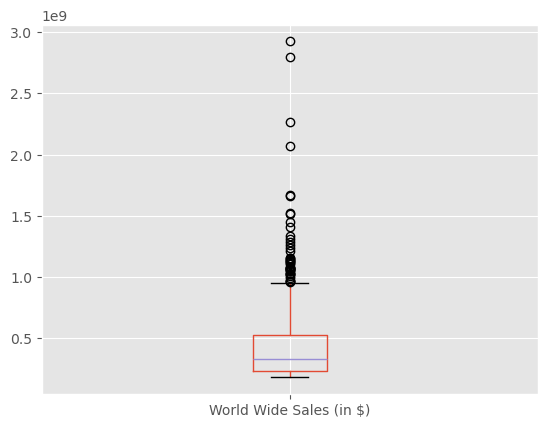

In [483]:
data.boxplot(column=['World Wide Sales (in $)'])

plt.show()

Removing Outliers

In [484]:
z_scores = stats.zscore(data['World Wide Sales (in $)'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 2)
data = data[filtered_entries]

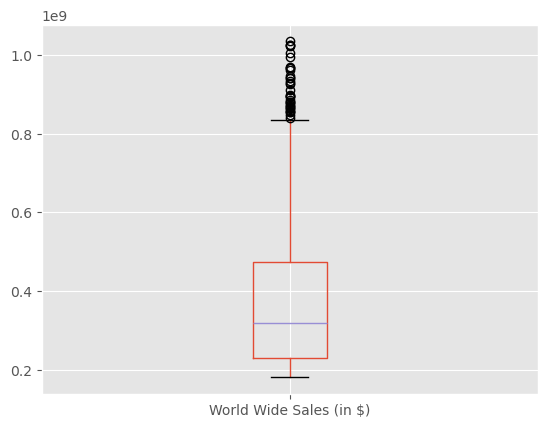

In [485]:
data.boxplot(column=['World Wide Sales (in $)'])

plt.show()

Data Exploration

Text(0.5, 1.0, 'Worlwide Sales vs Budget')

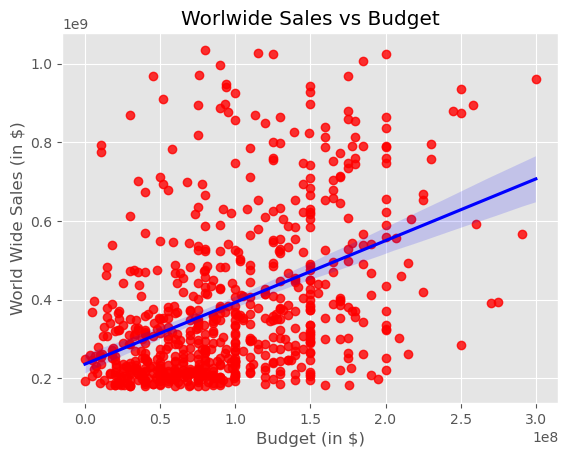

In [486]:
# looking at correlation

sns.regplot(x='Budget (in $)', y='World Wide Sales (in $)', data=data, scatter_kws={'color':'red'},line_kws = {"color": "blue"}).set_title('Worlwide Sales vs Budget')

Based on this graph, we can say that worldwide sales is influenced by budget. Although, the trend line is surrounded by a wide spread of data points, insinuating that other variables influence worldwide sales.

### Correlation Matrix:

Let's analyse the relationship between worlwide sales and all the other variables to see what has the greatest influence on movie sales.

Convert all columns to numeric values - this will help us understand the correlation between each variable and not just the numeric values.

In [487]:
data_numeric = data.copy()

for col_name in data_numeric.columns:
    if(data_numeric[col_name].dtype == 'object'):
        data_numeric[col_name]=data_numeric[col_name].astype('category')
        data_numeric[col_name]=data_numeric[col_name].cat.codes

Looking at the highest correlation:

In [488]:
corr_mat = data_numeric.corr()

corr_pairs = corr_mat.unstack()

# Sorting the correlation pairs
sorted_pairs = corr_pairs.sort_values()

# Including only pairs that have a correlation greater than 0.5.
# A correlation coefficient of 0.5 or larger represents a strong or large correlation.
high_corr = sorted_pairs[(sorted_pairs) > 0.5]  

high_corr

Domestic Opening (in $)  World Wide Sales (in $)    0.679296
World Wide Sales (in $)  Domestic Opening (in $)    0.679296
Year                     Release Date               0.999243
Release Date             Year                       0.999243
Title                    Title                      1.000000
World Wide Sales (in $)  World Wide Sales (in $)    1.000000
Running Time             Running Time               1.000000
Genre                    Genre                      1.000000
Release Date             Release Date               1.000000
Domestic Opening (in $)  Domestic Opening (in $)    1.000000
Budget (in $)            Budget (in $)              1.000000
Distributor              Distributor                1.000000
Year                     Year                       1.000000
License                  License                    1.000000
Month                    Month                      1.000000
dtype: float64

Data Visualisation:

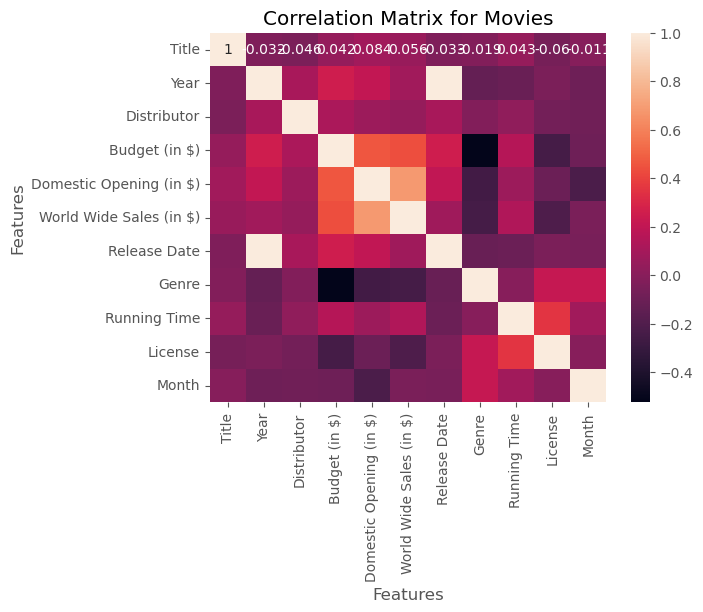

In [489]:
corr_matrix = data_numeric.corr(method = 'pearson')

sns.heatmap(corr_matrix, annot = True)
plt.title('Correlation Matrix for Movies')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

Conclusion: Domestic Opening had the strongest correlation with worldwide sales, which suggests that the release date of the movie influences the success of the movie. Budget also had a strong correlation with worldwide sales. Other variables, such as release date, genre and running time appear to be less influential on worlwide sales.


Determining the best time of the year to release a movie:

Tabulating the data:

In [490]:
data_numeric.groupby(['Month']).mean()

,Title,Year,Distributor,Budget (in $),Domestic Opening (in $),World Wide Sales (in $),Release Date,Genre,Running Time,License
Month,,,,,,,,,,
0,327.166667,2015.166667,24.444444,7.805556e+07,3.614760e+07,3.274438e+08,2015-05-18 08:00:00.000000000,90.666667,38.222222,1.777778
1,322.914286,2010.942857,24.342857,7.564286e+07,4.068944e+07,2.999878e+08,2011-01-22 04:48:00.000000000,142.742857,34.085714,2.171429
2,295.489796,2010.428571,24.122449,1.059878e+08,4.915889e+07,3.871651e+08,2010-08-26 23:30:36.734693888,103.387755,34.142857,1.897959
3,333.391304,2009.260870,24.000000,1.012609e+08,5.550520e+07,4.075309e+08,2009-07-20 02:05:13.043478272,121.869565,35.260870,1.913043
4,379.872340,2007.223404,24.191489,1.222330e+08,5.373456e+07,4.757915e+08,2007-07-31 22:43:24.255319040,104.457447,46.095745,1.978723
5,343.666667,2006.638095,24.828571,9.745905e+07,4.190675e+07,3.980580e+08,2007-02-05 15:18:51.428571392,113.619048,36.152381,1.866667
6,359.190476,2007.714286,23.238095,1.115638e+08,4.335178e+07,4.220215e+08,2008-03-28 12:34:17.142857216,99.678571,38.047619,2.059524
7,383.641026,2008.512821,22.051282,7.447436e+07,3.820260e+07,2.963143e+08,2009-01-24 11:04:36.923076864,134.948718,32.794872,2.333333
8,306.363636,2011.878788,23.242424,6.095500e+07,3.414987e+07,3.059367e+08,2012-08-25 22:32:43.636363520,151.272727,31.545455,2.060606


Data Visualisation:

range(1, 13)


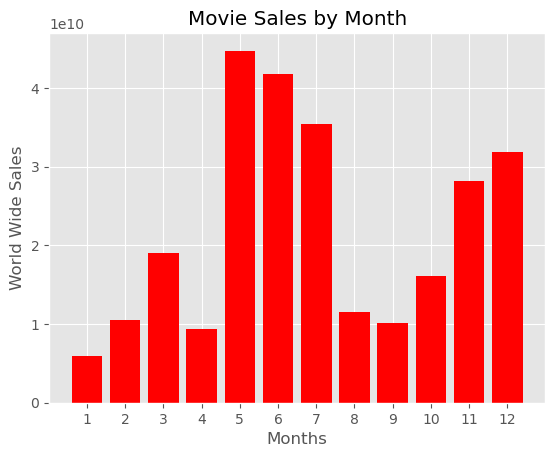

In [491]:
months = range(1,13)
print(months)

plt.bar(months, data_numeric.groupby(['Month']).sum(numeric_only=True)['World Wide Sales (in $)'], color='red')
plt.xticks(months)
plt.title('Movie Sales by Month')
plt.xlabel('Months')
plt.ylabel('World Wide Sales')
plt.show()

Conclusion: The best month to release a movie is May, based on the overall worldwide sales.

### What is the best runtime for a movie?

First we will need to convert the 'running time' variable into minutes:

In [492]:
def convert_to_minutes(time_str):
    match = re.match(r"(\d+)\s*hr\s*(\d+)\s*min", str(time_str))
    if match:
        hours = int(match.group(1))
        minutes = int(match.group(2))
        return hours * 60 + minutes
    return None

data['Running Time (min)'] = data['Running Time'].apply(convert_to_minutes)

data[['Title', 'Running Time', 'Running Time (min)']].head()

,Title,Running Time,Running Time (min)
44,Despicable Me 3,1 hr 29 min,89.0
46,Star Wars: Episode I - The Phantom Menace,2 hr 16 min,136.0
48,Alice in Wonderland,1 hr 48 min,108.0
49,Harry Potter and the Sorcerer's Stone,2 hr 32 min,152.0
51,The Dark Knight,2 hr 32 min,152.0


In [493]:
worldwide_sales_average = data.groupby(['Running Time (min)'])['World Wide Sales (in $)'].mean()
worldwide_sales_average.sort_values()

Running Time (min)
167.0    1.937725e+08
80.0     2.031724e+08
83.0     2.070398e+08
162.0    2.086796e+08
170.0    2.137199e+08
             ...     
149.0    6.552137e+08
142.0    7.060649e+08
152.0    7.520019e+08
148.0    8.598680e+08
179.0    9.479443e+08
Name: World Wide Sales (in $), Length: 93, dtype: float64

### Visualising the Data

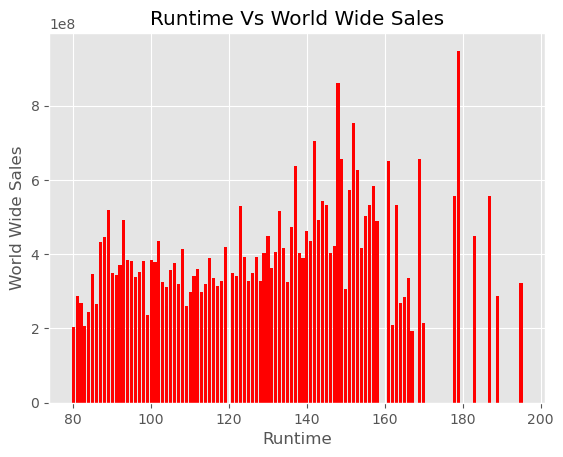

In [494]:
plt.bar(worldwide_sales_average.index, worldwide_sales_average, color = 'red')
plt.xlabel('Runtime')
plt.ylabel('World Wide Sales')
plt.title('Runtime Vs World Wide Sales')

plt.show()

Conclusion: Based on the plot, the best runtime for a movie is ideally between 120 to 160 minutes.

### What License has the most success?

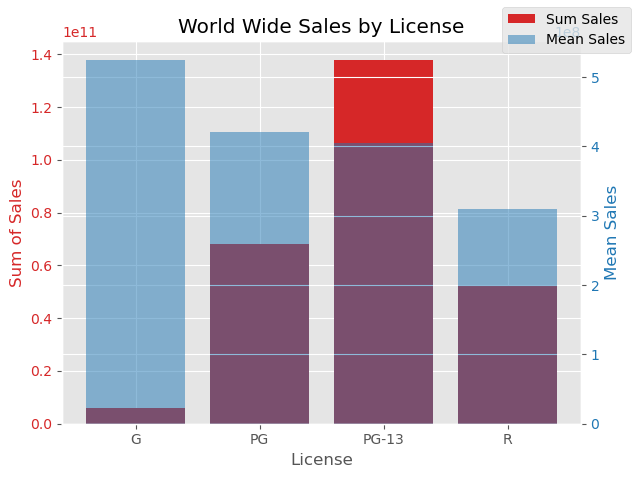

In [507]:
# Get the sum and mean of sales for each license
grouped_data = data.groupby(['License'])['World Wide Sales (in $)'].agg(['sum','mean'])
license = grouped_data.index.tolist()
sum_sales = grouped_data['sum'].tolist()
mean_sales = grouped_data['mean'].tolist()

# set up the bar chart
fig,ax1 = plt.subplots()

# Plot the bar chart for sum of sales
ax1.bar(license, sum_sales, color = 'tab:red', label = 'Sum Sales')

# Add labels and title
ax1.set_xlabel('License')
ax1.set_ylabel('Sum of Sales', color = 'tab:red')
ax1.tick_params(axis = 'y', labelcolor = 'tab:red')
ax1.set_title('World Wide Sales by License')

# Create a second y-axis for mean sales and coefficient of variation
ax2 = ax1.twinx()

# Plot the bar chart for mean sales and coefficient of variation
ax2.bar(license,mean_sales, color = 'tab:blue', alpha = 0.5, label = 'Mean Sales')

# Add labels and title
ax2.set_ylabel('Mean Sales', color = 'tab:blue')
ax2.tick_params(axis='y', labelcolor = 'tab:blue')

# Add a legend
fig.legend()

# Adjust layout
fig.tight_layout()

plt.show()

Conclusion: PG-13 had the highest level of success overall, while G had the highest average success rate.

### Conclusion

This analysis revealed that the most signficant factors which contribute to the success of a movie were the movie's domestic opening, as well as the budget. Additionally, the analysis suggests that movies released in May and have a runtime of 120-160 minutes are more likely to succeed.

Overall, my Python data analysis project provides insightful information about what factors contribute to a movies success.